In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel('Online Retail.xlsx')

In [3]:
df = df.sort_values('CustomerID',ascending=True)

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom
286628,562032,21578,WOODLAND DESIGN COTTON TOTE BAG,6,2011-08-02 08:48:00,2.25,12347.0,Iceland
72263,542237,47559B,TEA TIME OVEN GLOVE,10,2011-01-26 14:30:00,1.25,12347.0,Iceland
72264,542237,21154,RED RETROSPOT OVEN GLOVE,10,2011-01-26 14:30:00,1.25,12347.0,Iceland


In [5]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom
541540,581498,DOT,DOTCOM POSTAGE,1,2011-12-09 10:26:00,1714.17,NaN,United Kingdom


In [6]:
missing_count = df.isnull().sum()
value_count = df.isnull().count()
percetage = round((missing_count/value_count)*100,2)
percetage

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [7]:
emptynCusID = df[(df["CustomerID"].isnull() == True) | (df["CustomerID"].isnull() == False)]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541909 entries, 61619 to 541540
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 37.2+ MB


In [9]:
df['StockCode'] = df['StockCode'].apply(lambda x: str(x).strip())

In [10]:
df.dropna(inplace=True)

In [11]:
missing_count = df.isnull().sum()
value_count = df.isnull().count()
percetage = round((missing_count/value_count)*100,2)
percetage

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

In [12]:
df["Sales"] = df["Quantity"] * df["UnitPrice"]

In [13]:
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,-77183.6
286628,562032,21578,WOODLAND DESIGN COTTON TOTE BAG,6,2011-08-02 08:48:00,2.25,12347.0,Iceland,13.5
72263,542237,47559B,TEA TIME OVEN GLOVE,10,2011-01-26 14:30:00,1.25,12347.0,Iceland,12.5
72264,542237,21154,RED RETROSPOT OVEN GLOVE,10,2011-01-26 14:30:00,1.25,12347.0,Iceland,12.5


In [14]:
stck_code_df = pd.DataFrame(df.groupby(['StockCode','CustomerID']).aggregate({'Sales':'mean','Quantity':'sum'}))
stck_code_df.reset_index(inplace=True)
stck_code_df

,StockCode,CustomerID,Sales,Quantity
0,10002,12451.0,10.20,12
1,10002,12510.0,20.40,24
2,10002,12583.0,40.80,48
3,10002,12637.0,10.20,12
4,10002,12673.0,0.85,1
...,...,...,...,...
267610,POST,17935.0,2.90,1
267611,POST,17940.0,-75.00,-1
267612,POST,18223.0,-2.84,-1
267613,POST,18257.0,-8.65,-1


In [15]:
stck_code_df['StockCode'] = stck_code_df['StockCode'].astype('category')

In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
le = LabelEncoder()
stck_code_df['StockCode'] = le.fit_transform(stck_code_df['StockCode'])

In [17]:
from sklearn.preprocessing import Normalizer
nm = Normalizer()
stck_code_df_norm = nm.fit_transform(stck_code_df)

In [18]:
stck_code_df_norm = pd.DataFrame(stck_code_df_norm,columns=stck_code_df.columns)

In [19]:
stck_code_df_norm

,StockCode,CustomerID,Sales,Quantity
0,0.000000,0.999999,0.000819,0.000964
1,0.000000,0.999997,0.001631,0.001918
2,0.000000,0.999987,0.003242,0.003815
3,0.000000,0.999999,0.000807,0.000950
4,0.000000,1.000000,0.000067,0.000079
...,...,...,...,...
267610,0.201155,0.979559,0.000158,0.000055
267611,0.201100,0.979562,-0.004095,-0.000055
267612,0.198102,0.980181,-0.000153,-0.000054
267613,0.197747,0.980253,-0.000464,-0.000054


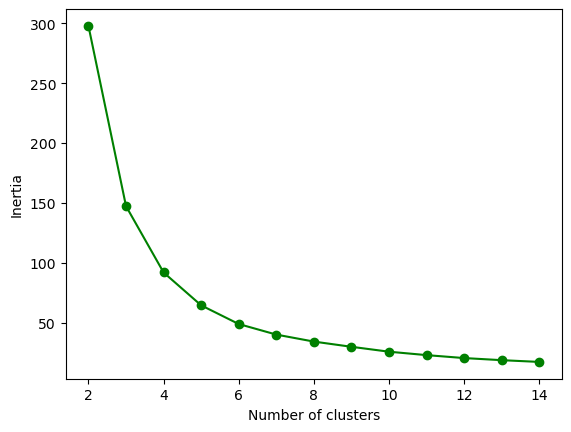

In [20]:
wcss = [] 

# using for loop to iterates
for i in range(2,15):
    
    #training k-means clustering in python on different clusters
    km = KMeans(n_clusters= i)
    km.fit(stck_code_df_norm)
    wcss.append(km.inertia_)
    
# ploting the elbow graph
plt.plot(range(2,15), wcss, 'og-')
plt.annotate('optimum clusters', xy=(5, 50000), xytext=(6, 100000), arrowprops=dict(facecolor='blue', shrink=0.05))

# labeling the data
plt.xlabel("Number of clusters")
plt.ylabel("Inertia");

In [20]:
# stck_code_df.head()

kmeans = KMeans(n_clusters = 5, random_state = 0)
kmeans.fit(stck_code_df_norm)

KMeans(n_clusters=5, random_state=0)

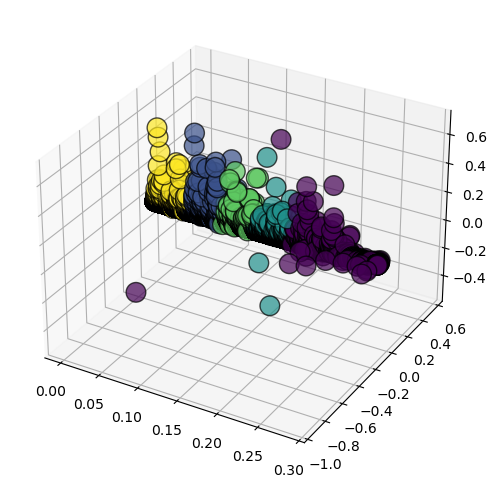

In [21]:

# ax = fig.add_subplot(111)
# scatter = ax.scatter(stck_code_df['StockCode'],stck_code_df['Sales'],stck_code_df['Quantity'], c= kmeans.labels_)
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(stck_code_df_norm['StockCode'],stck_code_df_norm['Sales'],stck_code_df_norm['Quantity'],
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=kmeans.labels_)
plt.show()
# ax.set_title('K-Means Clustering')
# ax.set_xlabel('StockCode')
# ax.set_ylabel('Quantity')
# plt.colorbar(scatter)

In [22]:
stck_code_df['Customser_Sagement'] = kmeans.labels_

In [23]:
stck_code_df_norm['Customser_Sagement'] = kmeans.labels_

In [24]:
stck_code_df.rename(columns={'Customser_Sagement':"Customer_Segment"},inplace=True)

In [25]:
kmeans.labels_.shape

(267615,)

In [26]:
stck_code_df.head()

,StockCode,CustomerID,Sales,Quantity,Customer_Segment
0,0,12451.0,10.20,12,4
1,0,12510.0,20.40,24,4
2,0,12583.0,40.80,48,4
3,0,12637.0,10.20,12,4
4,0,12673.0,0.85,1,4


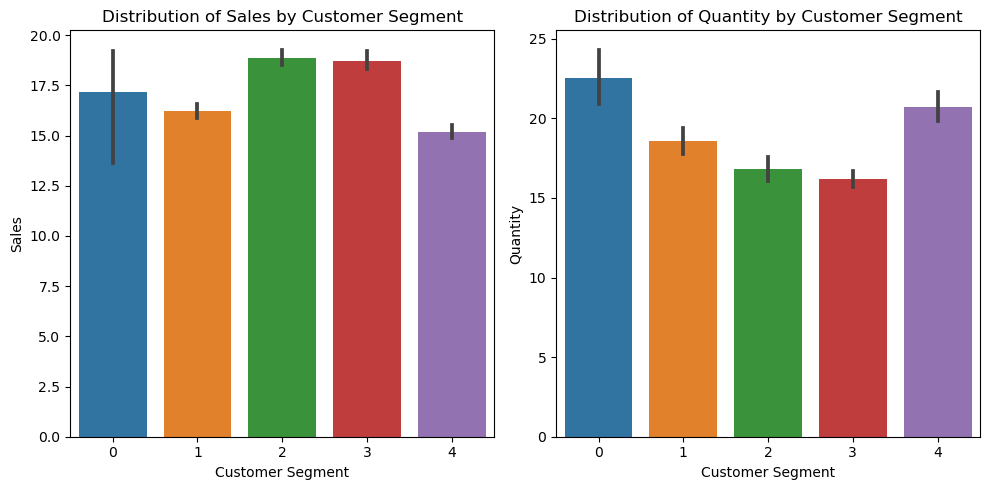

In [27]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# create a boxplot for Sales distribution in the first subplot
sns.barplot(x='Customer_Segment', y='Sales', data=stck_code_df, ax=axs[0])
axs[0].set_title('Distribution of Sales by Customer Segment')
axs[0].set_xlabel('Customer Segment')
axs[0].set_ylabel('Sales')

# create a boxplot for Quantity distribution in the second subplot
sns.barplot(x='Customer_Segment', y='Quantity', data=stck_code_df, ax=axs[1])
axs[1].set_title('Distribution of Quantity by Customer Segment')
axs[1].set_xlabel('Customer Segment')
axs[1].set_ylabel('Quantity')

# adjust the layout of the subplots and display the figure
plt.tight_layout()
plt.show()

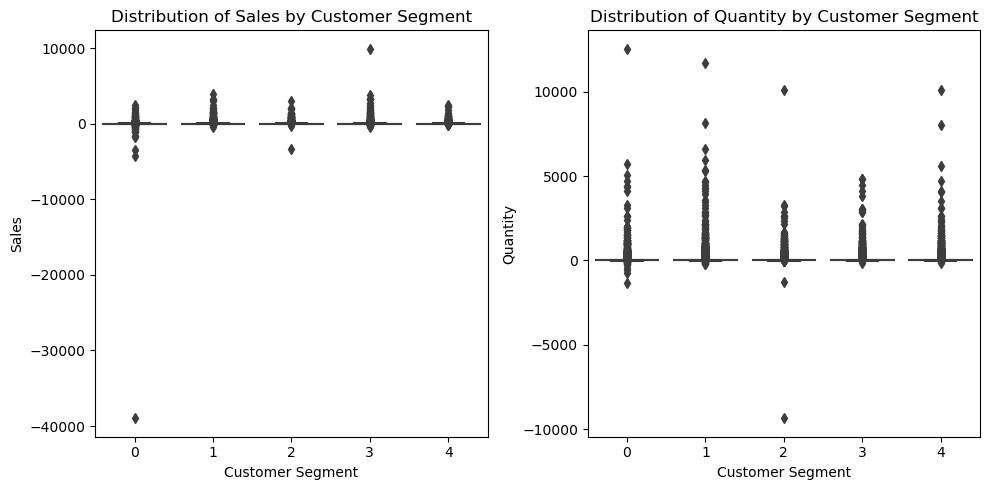

In [28]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# create a boxplot for Sales distribution in the first subplot
sns.boxplot(x='Customer_Segment', y='Sales', data=stck_code_df, ax=axs[0])
axs[0].set_title('Distribution of Sales by Customer Segment')
axs[0].set_xlabel('Customer Segment')
axs[0].set_ylabel('Sales')

# create a boxplot for Quantity distribution in the second subplot
sns.boxplot(x='Customer_Segment', y='Quantity', data=stck_code_df, ax=axs[1])
axs[1].set_title('Distribution of Quantity by Customer Segment')
axs[1].set_xlabel('Customer Segment')
axs[1].set_ylabel('Quantity')

# adjust the layout of the subplots and display the figure
plt.tight_layout()
plt.show()

In [29]:
tr = pd.DataFrame({
    'StockCode': [0.0],
    'CustomerID':[0.999999],
    'Sales': [0.000819],
    'Quantity': [0.000964]
})

In [30]:
tr.values

array([[0.00000e+00, 9.99999e-01, 8.19000e-04, 9.64000e-04]])

In [32]:

kmeans.predict(tr.values)

C:\Users\nitun\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([4])

In [28]:
stck_code_df_norm.head()

,StockCode,CustomerID,Sales,Quantity,Customser_Sagement
0,0.0,0.999999,0.000819,0.000964,4
1,0.0,0.999997,0.001631,0.001918,4
2,0.0,0.999987,0.003242,0.003815,4
3,0.0,0.999999,0.000807,0.000950,4
4,0.0,1.000000,0.000067,0.000079,4


In [34]:
##apply Random Forest to get the predication
stck_code_df_norm.corr()

,StockCode,CustomerID,Sales,Quantity,Customser_Sagement
StockCode,1.000000,-0.927216,0.030747,-0.002710,-0.535430
CustomerID,-0.927216,1.000000,0.016589,-0.108713,0.510639
Sales,0.030747,0.016589,1.000000,0.362848,-0.005830
Quantity,-0.002710,-0.108713,0.362848,1.000000,-0.006104
Customser_Sagement,-0.535430,0.510639,-0.005830,-0.006104,1.000000


<AxesSubplot:>

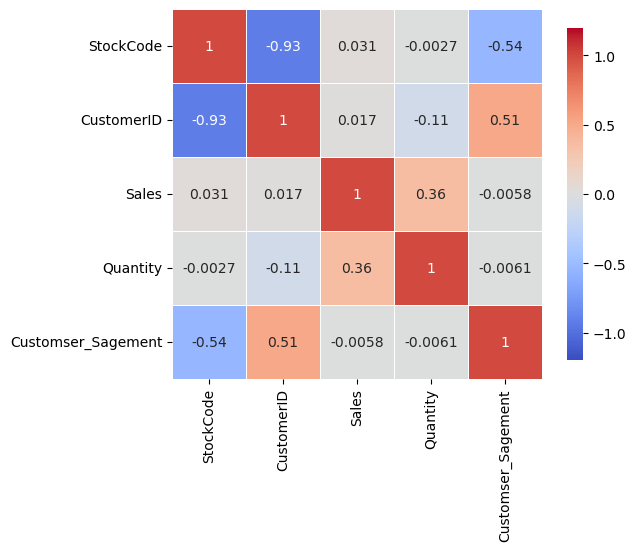

In [35]:
sns.heatmap(stck_code_df_norm.corr(), center=0, square=True, linewidths=.5,cbar_kws={"shrink": .9}, vmin=-1.2,vmax=1.2, cmap='coolwarm', annot=True)

In [31]:
stck_code_df_norm_classification = stck_code_df_norm.drop(columns=('CustomerID'))

In [32]:
from sklearn.model_selection import train_test_split
y = stck_code_df_norm_classification['Customser_Sagement']
x = stck_code_df_norm_classification.drop(columns=('Customser_Sagement'))
x_train ,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [33]:
x_train.shape,y_train.shape

((214092, 3), (214092,))

In [34]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
# rfc=RandomForestClassifier()
# grid_space={
#               'n_estimators':[10,100,200],
#               'min_samples_leaf':[1,2,3,4],
#               'min_samples_split':[1,2,3,4],
#               'max_features': ['auto', 'sqrt', 'log2'],
#               'max_depth' : [4,5,6,7,8],
#               'criterion' :['gini', 'entropy']
#            }
# CV_rfc = GridSearchCV(estimator=rfc, param_grid=grid_space,scoring='accuracy', cv= 4)
# CV_rfc.fit(x_train, y_train)
# CV_rfc.best_params_

In [55]:
from sklearn.model_selection import RandomizedSearchCV
grid_space={
              'n_estimators':[10,100,200],
              'min_samples_leaf':[1,2,3,4],
              'min_samples_split':[1,2,3,4],
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth' : [4,5,6,7,8],
              'criterion' :['gini', 'entropy']
           }
random_search = RandomizedSearchCV(rfc, param_distributions=grid_space, 
    n_iter=20, cv=5) 
random_search.fit(x_train, y_train)

C:\Users\nitun\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\nitun\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nitun\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\nitun\anaconda3\lib\site-packages\joblib\parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\nitun\anaconda3\lib\site-packages\j

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 5, 6, 7, 8],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [1, 2, 3, 4],
                                        'n_estimators': [10, 100, 200]})

In [56]:
random_search.best_params_

{'n_estimators': 100,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 8,
 'criterion': 'entropy'}

In [37]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc1 = RandomForestClassifier(n_estimators=100, 
                              min_samples_split=4, 
                              min_samples_leaf=2, 
                              max_features='log2', 
                              max_depth=8, 
                              criterion='entropy')

In [38]:
rfc1.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='log2',
                       min_samples_leaf=2, min_samples_split=4)

In [39]:
from sklearn.metrics import accuracy_score
y_pred = rfc1.predict(x_test)
accuracy_score(y_pred,y_test)

0.9999439493301945

In [40]:
pd.DataFrame({'Name':x_train.columns,'feature_importances_':rfc1.feature_importances_})

,Name,feature_importances_
0,StockCode,0.989108
1,Sales,0.006153
2,Quantity,0.004739


In [69]:
import pickle
pickle.dump(rfc1,open('rfc1_cusSagement.pkl','wb'))
#kmeans
pickle.dump(kmeans,open('kmeans_cusSagement.pkl','wb'))
#le -- For stock code
pickle.dump(le,open('le_stockCode_transform.pkl','wb'))
# nm -- 2nd fit for StockCode	CustomerID	Sales	Quantity --> df.groupby(['StockCode','CustomerID']).aggregate({'Sales':'mean','Quantity':'sum'})
pickle.dump(nm,open('nm_2nd_transform.pkl','wb'))

### start here for other params

In [137]:
datePreictiondf = pd.DataFrame(df.groupby(['StockCode']).aggregate({'InvoiceDate':lambda date:((date.max() - date.min())/date.count()).days}))
datePreictiondf.reset_index(inplace=True)
npdatePred = Normalizer()

datePreictiondf['StockCode'] = le.transform(datePreictiondf['StockCode'] )
# from sklearn.preprocessing import StandardScaler
# s = StandardScaler()
# datePreictiondf_norm = s.fit_transform(datePreictiondf)
# datePreictiondf_norm = pd.DataFrame(datePreictiondf_norm,columns=datePreictiondf.columns)
datePreictiondf.head()

,StockCode,InvoiceDate
0,0,2
1,1,12
2,2,12
3,3,39
4,4,66


In [138]:
datePreictiondf

,StockCode,InvoiceDate
0,0,2
1,1,12
2,2,12
3,3,39
4,4,66
...,...,...
3679,3679,4
3680,3680,6
3681,3681,0
3682,3682,40


<AxesSubplot:>

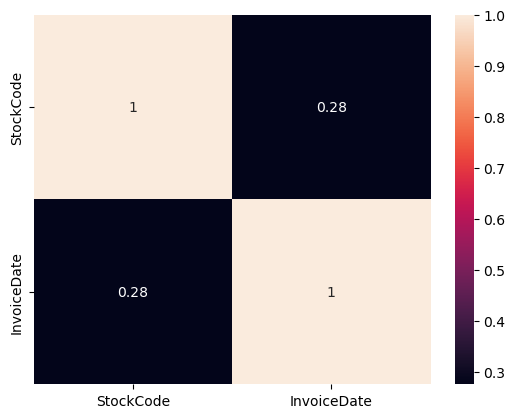

In [42]:
sns.heatmap(datePreictiondf.corr(),annot=True)

In [139]:
datePreictiondf

,StockCode,InvoiceDate
0,0,2
1,1,12
2,2,12
3,3,39
4,4,66
...,...,...
3679,3679,4
3680,3680,6
3681,3681,0
3682,3682,40


In [141]:
datePreictiondf = datePreictiondf.sort_values('InvoiceDate',ascending=False)

C:\Users\nitun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='StockCode', ylabel='InvoiceDate'>

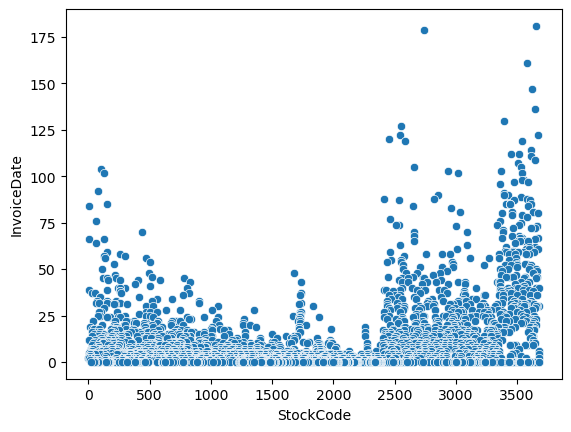

In [142]:
sns.scatterplot(datePreictiondf['StockCode'],datePreictiondf['InvoiceDate'])

<AxesSubplot:>

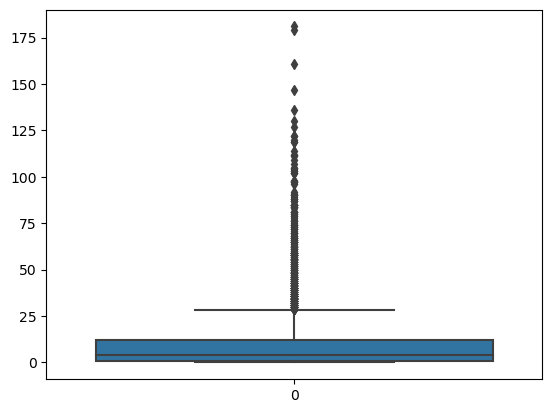

In [134]:
sns.boxplot(data=datePreictiondf['InvoiceDate'])

<AxesSubplot:xlabel='InvoiceDate', ylabel='Count'>

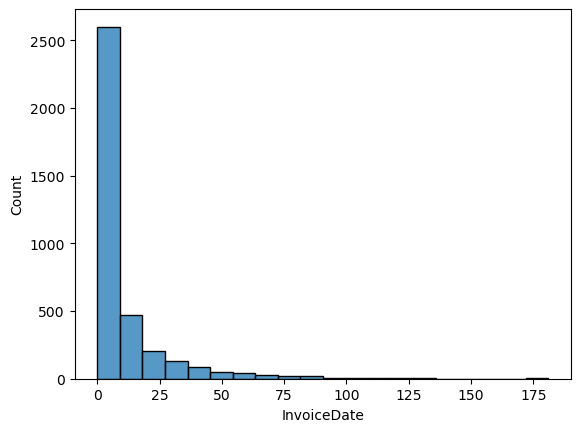

In [143]:
sns.histplot(datePreictiondf['InvoiceDate'],bins = 20)

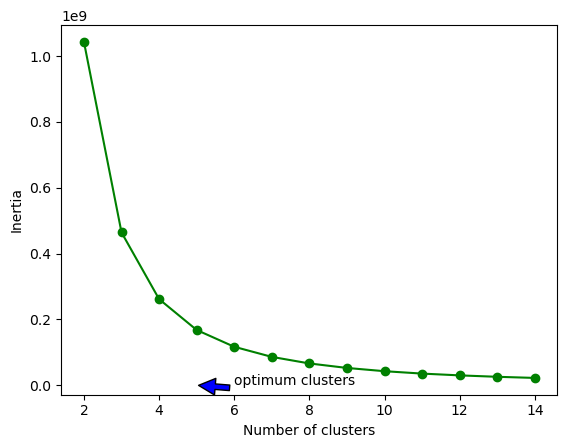

In [144]:
wcss = []
# using for loop to iterates
for i in range(2,15):
    
    #training k-means clustering in python on different clusters
    km = KMeans(n_clusters= i)
    km.fit(datePreictiondf)
    wcss.append(km.inertia_)
    
# ploting the elbow graph
plt.plot(range(2,15), wcss, 'og-')
plt.annotate('optimum clusters', xy=(5, 50000), xytext=(6, 100000), arrowprops=dict(facecolor='blue', shrink=0.05))

# labeling the data
plt.xlabel("Number of clusters")
plt.ylabel("Inertia");

In [145]:
kmeansDate = KMeans(n_clusters = 5, random_state = 0)
kmeansDate.fit(datePreictiondf)

KMeans(n_clusters=5, random_state=0)

C:\Users\nitun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='InvoiceDate', ylabel='StockCode'>

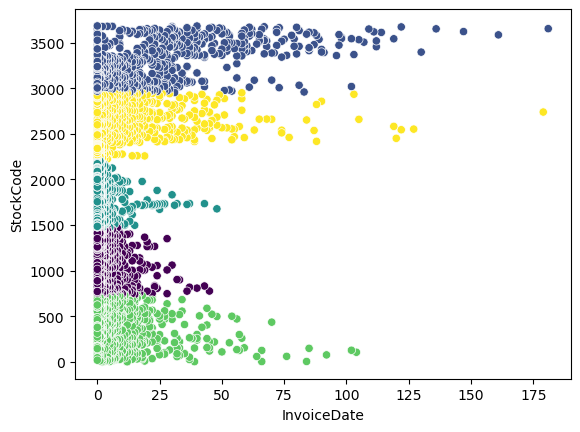

In [146]:
sns.scatterplot(datePreictiondf['InvoiceDate'],datePreictiondf['StockCode'], c= kmeansDate.labels_)

In [147]:
datePreictiondf['Next Expexcted Call'] = kmeansDate.labels_

In [155]:
datePreictiondf['Next Expexcted Call'].replace({0:10,1:12,2:3,3:24,4:5},inplace=True)

In [163]:
datePreictiondf.head()

,StockCode,InvoiceDate,Next Expexcted Call
3653,3653,181,12
2739,2739,179,5
3585,3585,161,12
3621,3621,147,12
3651,3651,136,12


In [164]:
x_dt_pred = datePreictiondf.drop(columns=['Next Expexcted Call','InvoiceDate'])
y_dt_pred = datePreictiondf['Next Expexcted Call']
x_dt_pred_train,x_dt_pred_test,y_dt_pred_train,y_dt_pred_test=train_test_split(x_dt_pred,y_dt_pred,random_state=32,test_size=0.2)
from sklearn.model_selection import RandomizedSearchCV
grid_space={
              'n_estimators':[10,100,200],
              'min_samples_leaf':[1,2,3,4],
              'min_samples_split':[1,2,3,4],
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth' : [4,5,6,7,8],
              'criterion' :['gini', 'entropy']
           }
random_search = RandomizedSearchCV(rfc, param_distributions=grid_space, 
    n_iter=20, cv=5) 
random_search.fit(x_dt_pred_train, y_dt_pred_train)
random_search.best_params_

C:\Users\nitun\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\nitun\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nitun\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\nitun\anaconda3\lib\site-packages\joblib\parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\nitun\anaconda3\lib\site-packages\j

{'n_estimators': 10,
 'min_samples_split': 4,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': 8,
 'criterion': 'entropy'}

In [165]:
from sklearn.ensemble import RandomForestClassifier
rfc2=RandomForestClassifier()
rfc3 = RandomForestClassifier(n_estimators=10, 
                              min_samples_split=4, 
                              min_samples_leaf=3, 
                              max_features='sqrt', 
                              max_depth=8, 
                              criterion='entropy')
rfc3.fit(x_dt_pred_train, y_dt_pred_train)
y_pred = rfc3.predict(x_dt_pred_test)
accuracy_score(y_pred,y_dt_pred_test)

1.0

In [166]:
pickle.dump(rfc3,open('invoice_predicted_date_rfc3.pkl','wb'))

In [67]:
finalCalldf = datePreictiondf.groupby('Next Expexcted Call').aggregate({'InvoiceDate':'mean'})
finalCalldf.reset_index(inplace=True)

In [72]:
finalCalldf['InvoiceDate'] = round(finalCalldf['InvoiceDate'])
finalCalldf.head()

,Next Expexcted Call,InvoiceDate
0,0,10.0
1,1,12.0
2,2,3.0
3,3,24.0
4,4,5.0


In [74]:
import pickle
pickle.dump(kmeansDate,open('kmeans_pred_Date.pkl','wb'))


In [169]:
stock_code_trans = pickle.load(open('le_stockCode_transform.pkl','rb'))
after_stock_code_trans = pickle.load(open('nm_2nd_transform.pkl','rb'))
invoice_predicted_date_rfc3 = pickle.load(open('invoice_predicted_date_rfc3.pkl','rb'))
# rfc1
rfc1_clus = pickle.load(open('rfc1_cusSagement.pkl','rb'))

In [191]:


test_data_df = {'InvoiceNo': [61619,61619],
        'StockCode': ['21578','85174'],
        'Description': ['MEDIUM CERAMIC TOP STORAGE JAR','ok'],
        'Quantity': [74215,10],
        'InvoiceDate': ['2011-01-18 10:01:00','2011-01-18 10:01:00'],
        'UnitPrice': [1.04,1.04],
        'CustomerID': [12346.0,12347.0],
        'Country': ['United Kingdom','United Kingdom']}

test_data_df = pd.DataFrame(test_data_df)
test_data_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,61619,21578,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
1,61619,85174,ok,10,2011-01-18 10:01:00,1.04,12347.0,United Kingdom


In [192]:
test_data_df['StockCode'] = stock_code_trans.transform(test_data_df['StockCode'].values)
test_data_df['Sales'] = test_data_df['Quantity'] * test_data_df['UnitPrice']
norm_df = pd.DataFrame(after_stock_code_trans.transform(test_data_df[['StockCode','CustomerID','Sales','Quantity']].values))
norm_df_rfc = norm_df.drop(columns=[1])
t = rfc1_clus.predict(norm_df_rfc.values)
# t
# for i in t:
dt_pred = test_data_df['StockCode'].values
dt_pred = dt_pred.reshape(-1,1)
invoice_predicted_date_rfc3.predict(dt_pred)
test_data_df['Predicted Days'] = invoice_predicted_date_rfc3.predict(dt_pred)
test_data_df.to_html()

C:\Users\nitun\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Normalizer was fitted with feature names
  warnings.warn(
C:\Users\nitun\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\nitun\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\nitun\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>InvoiceNo</th>\n      <th>StockCode</th>\n      <th>Description</th>\n      <th>Quantity</th>\n      <th>InvoiceDate</th>\n      <th>UnitPrice</th>\n      <th>CustomerID</th>\n      <th>Country</th>\n      <th>Sales</th>\n      <th>Predicted Days</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>61619</td>\n      <td>648</td>\n      <td>MEDIUM CERAMIC TOP STORAGE JAR</td>\n      <td>74215</td>\n      <td>2011-01-18 10:01:00</td>\n      <td>1.04</td>\n      <td>12346.0</td>\n      <td>United Kingdom</td>\n      <td>77183.6</td>\n      <td>24</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>61619</td>\n      <td>3299</td>\n      <td>ok</td>\n      <td>10</td>\n      <td>2011-01-18 10:01:00</td>\n      <td>1.04</td>\n      <td>12347.0</td>\n      <td>United Kingdom</td>\n      <td>10.4</td>\n      <td>12</td>\n    </tr>\n  </tbody>\n</table>'